---
title: "Intro to DSGE Model & Julia Basics"
subtitle: "Business Cycles and Fluctuations - AE2E6"
format:
    ipynb:
        output_file: correction.ipynb
    html:
        output_file: correction.html
---

::: {.callout-note collapse="true" title="Objectives"}


- Introduce Julia environment
    - run cells
    - basic types: numbers, strings, vectors, matrices
    - functions
    - simple plots
- Simulate AR1 models
    - impulse response functions
    - stochastic simulations
        - conditional / unconditional moments
    - develop intuition about eigenvalues / ergodic distributions

:::    

# Julia: Quick Introduction

## Why Julia?

Developped at MIT on top of __opensource__ technologies

- linux / git / llvm

Syntax inspired by Matlab but:

- more consistent
- lots of features from high level languages

Everything is JIT-compiled

- no interpreted vs compiled treadeoff -> very fast
- most of the base library is written in Julia

Opensource/free + vibrant community

## Numbers

In [65]:
# numbers (usual operations usual)
(1.0+(2.0+3.0*(4.0+5.0)))/30

1.0

In [66]:
# exponentials are denoted by ^
2^8

256

## Variables / assignments / comparisons

In [67]:
# variable assignment
x = 10

10

In [68]:
# Variable names can have Unicode characters
# To get ϵ in the REPL, type \epsilon<TAB>
a = 20
σ = 34
ϵ = 1e-4

0.0001

In [69]:
# comparison 
2 == 3

false

In [70]:
3<=3

true

## Strings

In [71]:
# Strings can also contain Unicode characters
fancy_str = "α is a string"

"α is a string"

In [72]:
# double quotes define a character, not a string
'c' 

'c': ASCII/Unicode U+0063 (category Ll: Letter, lowercase)

In [73]:
# string interpolation (1/2)
he_who_must_not_be_named = "Voldemort"
"Welcome $(he_who_must_not_be_named)!"

"Welcome Voldemort!"

In [74]:
# string interpolation (2/2)
n = 1999999
println("Iteration ", n, " is still running...")

Iteration 1999999 is still running...


## Arrays

In [75]:
# vectors
v = [1,2,3]

3-element Vector{Int64}:
 1
 2
 3

In [76]:
# matrices 
M = [1 2 3 ; 4 5 6 ; 7 8 9]

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

In [77]:
# matrix multiplication
M*v

3-element Vector{Int64}:
 14
 32
 50

In [78]:
# mutating vectors
x = ["One"]
push!(x, "Two")
push!(x, "Three")
push!(x, "Four")
push!(x, "Five")

# Note how the type of the vector is different from above
# Vectors in Julia hold homoegenous types

# Also note the exclation mark in `push!`: it is a reminder
# of the fact that `push!` mutates its first argument

5-element Vector{String}:
 "One"
 "Two"
 "Three"
 "Four"
 "Five"

In [79]:
# access elements in a vector
v[1]

1

In [80]:
# access elements in a matrix
M[1,2]

2

::: {.callout-warning}

Indexing in Julia is 1-based. First element of a collection is denoted by 1.

:::

In [81]:
# slice matrices
println(M)

# keep first line
println("First line")
println(M[1,:])

# keep second column
println("Second column")
println(M[:,2])

# extract a submatrix
println(M[1:2,1:2])

[1 2 3; 4 5 6; 7 8 9]
First line
[1, 2, 3]
Second column
[2, 5, 8]
[1 2; 4 5]


In [82]:
# concatenate vectors (horizontally)
vcat( [1,2], [3,4])

4-element Vector{Int64}:
 1
 2
 3
 4

In [83]:
# concatenate vectors
hcat( [1,2], [3,4])

2×2 Matrix{Int64}:
 1  3
 2  4

In [84]:
# transpose matrix
hcat( [1,2], [3,4])'

2×2 adjoint(::Matrix{Int64}) with eltype Int64:
 1  2
 3  4

## Tuples

In [85]:
# like in python
# tuples can hold heterogenous data
t = ("This", "is", 1, "tuple")

("This", "is", 1, "tuple")

In [86]:
# access elements in a tuple (still 1-based)
t[3]

1

In [87]:
# tuples are `immutable`
# The following should raise an exception
push!(t, "not a vector")

MethodError: MethodError: no method matching push!(::Tuple{String, String, Int64, String}, ::String)
The function `push!` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  push!(::Any, ::Any, !Matched::Any)
   @ Base abstractarray.jl:3529
  push!(::Any, ::Any, !Matched::Any, !Matched::Any...)
   @ Base abstractarray.jl:3530
  push!(!Matched::BitVector, ::Any)
   @ Base bitarray.jl:752
  ...


## Loops

In [88]:
# loop over any iterable (like in python)
for i in 1:5
    println("Iteration ", i)
end
# note how 1 and 5 are both included.


Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5


In [89]:
for i ∈ ["Paris", "New-York", "Bogota"]
    println("City: ", i)
end

City: Paris
City: New-York
City: Bogota


In [90]:
# Vector comprehensions (like in python)
# enumerate all squares of even numbers (% computes modulo)
[i^2 for i=1:10 if i%2==1]

5-element Vector{Int64}:
  1
  9
 25
 49
 81

## Functions

In [91]:
# matlab like syntax
# with positional and keyword arguments separated by `;`

function fun(a,b; c=3)
    z = a+b*c
    return z
end

fun (generic function with 1 method)

In [92]:
fun(1,2)

7

In [93]:
fun(1,2; c=4)

9

# Manipulating AR1 Models

We consider here a simple autoregressive model:

$$y_t = A y_{t-1} + B e_t$$

where $y_t=(y^1_t, y^2_t)$ a vector of variables and  $e_t=(e^1_t, e^2_t)$ a normal i.i.d. multivariate process defined by covariance matrix $\Sigma \in R^p \times R^p$.



We start by choosing: 

$$A = \begin{bmatrix}\rho & 2 \\ 0 & \lambda\end{bmatrix}$$

$$B = \begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix}$$

$$\Sigma = \begin{bmatrix}0.05 & 0.005 \\ 0.005 & 0.01\end{bmatrix}$$

__Define julia variables for matrices $A, B, \Sigma$.__


In [94]:
ρ = 0.3
λ = 0.5
A = [ρ 2; 0 λ]

2×2 Matrix{Float64}:
 0.3  2.0
 0.0  0.5

In [95]:
# B is the identity matrix
B = [1.0 0.0; 0.0 1.0] # pay attention to use floats rather than integers

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

In [96]:
# a more julian way of using the identity matrix
using LinearAlgebra: I
B = I
# the resulting object adapts to any size (no need to instantiate it)

UniformScaling{Bool}
true*I

In [97]:
Σ = [0.05 0.005; 0.005 0.01]

2×2 Matrix{Float64}:
 0.05   0.005
 0.005  0.01

__Compute (programmatically) the eigenvalues of A.__


In [98]:
using LinearAlgebra
eigvals(A)
# no surprise: these are equal to λ, ρ

2-element Vector{Float64}:
 0.3
 0.5

In [99]:
A*[0,1]

2-element Vector{Float64}:
 2.0
 0.5

__Simulate the response to a one deviation shock to $e^1_t$ and $e^2_t$ over 10 periods.__

In [100]:
# an easy to read / inefficient solution

# pay attention that diagonal terms in Σ contain the variance...

e0_1 = [sqrt(Σ[1,1]), 0.0]
e0_2 = [0.0, sqrt(Σ[2,2])]

sim_y_1 = hcat([A^n*e0_1 for n in 0:10]...)
sim_y_2 = hcat([ A^n*e0_2 for n in 0:10 ]...)

2×11 Matrix{Float64}:
 0.0  0.2   0.16   0.098   0.0544   0.02882   …  0.00193344   0.000970658
 0.1  0.05  0.025  0.0125  0.00625  0.003125     0.000195313  9.76563e-5

__Plot the result using Plots.jl__

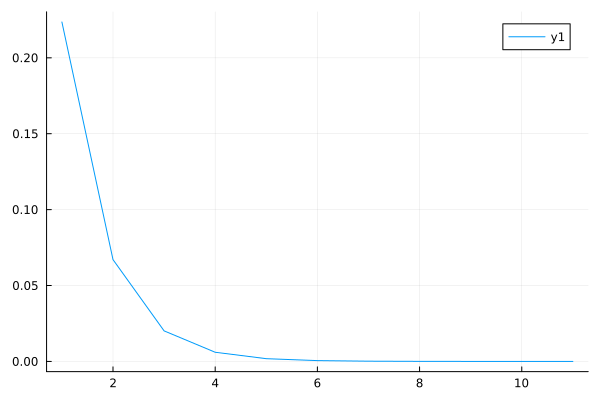

In [101]:
using Plots

plot(sim_y_1[1,:])

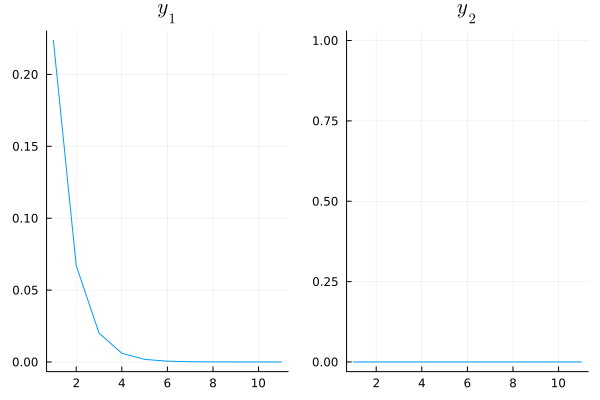

In [102]:
# we can make to plots size by size
plot( plot(sim_y_1[1,:], title="\$y_1\$", legend=false), plot(sim_y_1[2,:], title="\$y_2\$", legend=false))

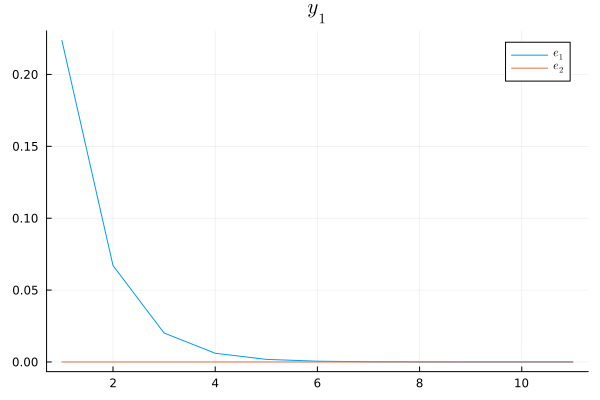

In [103]:
# or maake two plots on the same graph:
pl = plot(  sim_y_1[1,:], label="\$e_1\$", title="\$y_1\$" )
plot!(pl,sim_y_1[2,:], label="\$e_2\$")

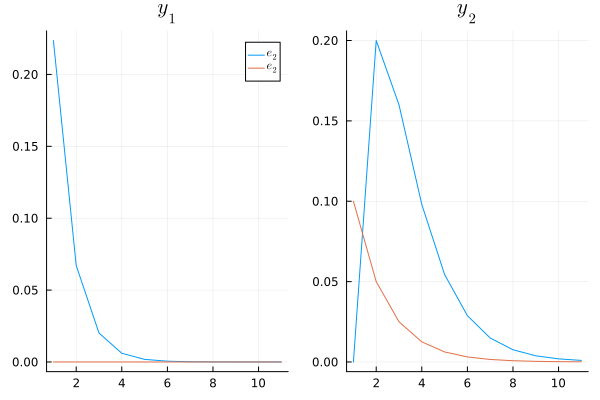

In [104]:
# Let's combine everything

pl1 = plot(  sim_y_1[1,:], label="\$e_2\$", title="\$y_1\$" )
plot!(pl1,sim_y_1[2,:], label="\$e_2\$")
pl2 = plot(  sim_y_2[1,:], label="\$e_2\$", title="\$y_2\$" )
plot!(pl2,sim_y_2[2,:], label="\$e_2\$", legend=false)
plot(pl1, pl2)

Remarks: we see that the response to the second shock is not monotonous (in the first two periods, $y_2$ increases). This is a result of the fact that
$|||A||| > \rho(A)$

__What do you get if one eigenvalue is equal to 1? Greater than 1?__

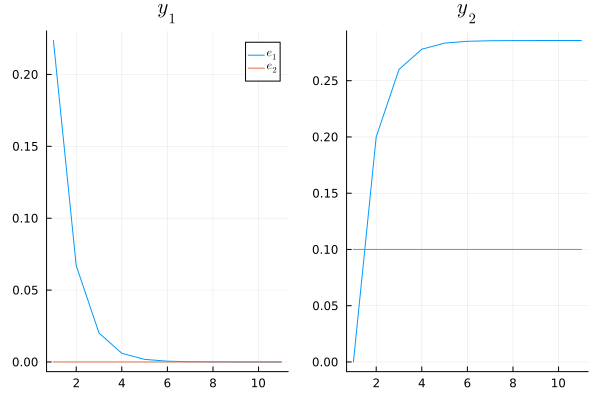

In [105]:
# unit root case
ρ = 0.3
λ = 1.0

A = [ρ 2; 0 λ]

e0_1 = [sqrt(Σ[1,1]), 0.0]
e0_2 = [0.0, sqrt(Σ[2,2])]

sim_y_1 = hcat([A^n*e0_1 for n in 0:10]...)
sim_y_2 = hcat([ A^n*e0_2 for n in 0:10 ]...)
pl1 = plot(  sim_y_1[1,:], label="\$e_1\$", title="\$y_1\$" )
plot!(pl1,sim_y_1[2,:], label="\$e_2\$")
pl2 = plot(  sim_y_2[1,:], label="\$e_1\$", title="\$y_2\$" )
plot!(pl2,sim_y_2[2,:], label="\$e_2\$", legend=false)
plot(pl1, pl2)

We see that the shock $e_1$ has a persistent effect on $y_2$. It is associated to the unit root.
The new steady-state is not the original one.

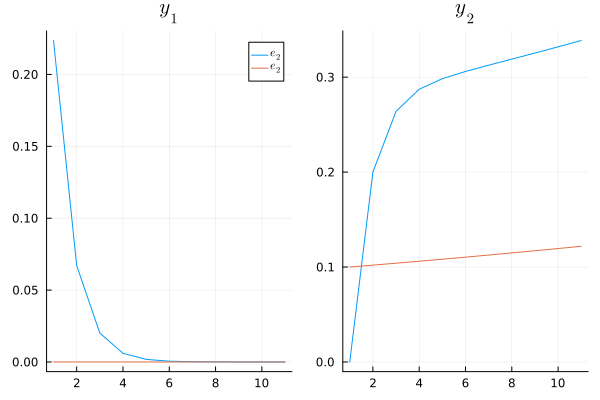

In [106]:
# explosive case
ρ = 0.3
λ = 1.02

A = [ρ 2; 0 λ]

e0_1 = [sqrt(Σ[1,1]), 0.0]
e0_2 = [0.0, sqrt(Σ[2,2])]

sim_y_1 = hcat([A^n*e0_1 for n in 0:10]...)
sim_y_2 = hcat([ A^n*e0_2 for n in 0:10 ]...)
pl1 = plot(  sim_y_1[1,:], label="\$e_2\$", title="\$y_1\$" )
plot!(pl1,sim_y_1[2,:], label="\$e_2\$")
pl2 = plot(  sim_y_2[1,:], label="\$e_2\$", title="\$y_2\$" )
plot!(pl2,sim_y_2[2,:], label="\$e_2\$", legend=false)
plot(pl1, pl2)

Now the variable $y_2$ diverges.
Note that $y_1$ does not diverge because of the specific initial shock (colinear to [1,0]). 

__Import the Distributions package. Use `MvNormal` to compute draws from a multivariate distribution with covariance matrix $\Sigma$__

In [110]:
# we need the distributions package to compute mvnormal
# import Pkg; Pkg.add("Distributions")

In [111]:
using Distributions

# MvNormal
# check the doc

In [112]:
dis = MvNormal(Σ)
rand(dis)

2-element Vector{Float64}:
 -0.055367726741675345
 -0.13620922040042954

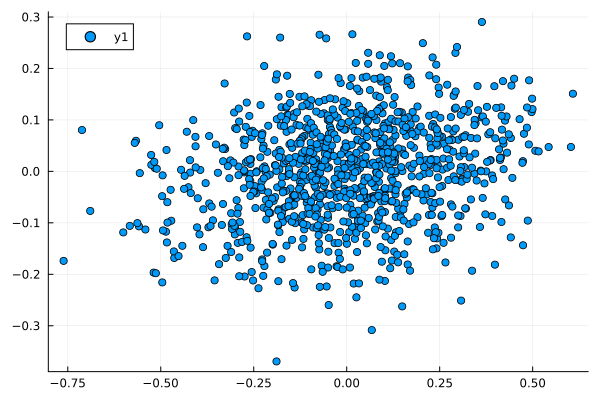

In [113]:
# we can plot the distribution of $\epsilon$
random_points = [rand(dis) for i=1:1000]
pl = scatter([e[1] for e in random_points], [e[2] for e in random_points])


In [120]:
# even better, with the StatsPlots Library
# import Pkg; Pkg.add("StatsPlots")

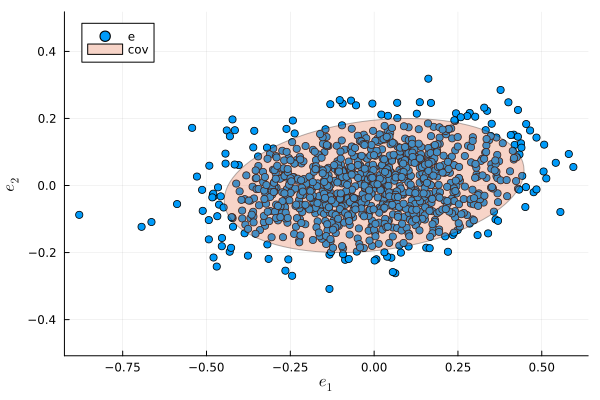

In [121]:
using StatsPlots
random_points = [rand(dis) for i=1:1000]
pl = scatter([e[1] for e in random_points], [e[2] for e in random_points], label="e", xlabel="\$e_1\$", ylabel="\$e_2\$")
covellipse!([0,0], Σ, n_std=2, aspect_ratio=1, label="cov")

__Perform a stochastic simulation over 20 periods starting with a one standard-deviation in $e_2$.__

In [122]:
# return to old value of A
ρ = 0.3
λ = 0.5

A = [ρ 2; 0 λ]

2×2 Matrix{Float64}:
 0.3  2.0
 0.0  0.5

In [124]:
function simulate(A,B,Σ,e0=zeros(2); T=20)
    
    # initialize distribution object
    dis = MvNormal(Σ)
    
    # create vector to hold the simulation
    sim = [B*e0]

    for t=1:T

        e1 = rand(dis)

        y0 = sim[end] # last value
        y1 = A*y0 + B*e1

        push!(sim, y1)


    end

    return hcat(sim...)
end

simulate (generic function with 2 methods)

In [125]:
sim = simulate(A,B,Σ,e0_2)

2×21 Matrix{Float64}:
 0.0  0.392371    0.374782  -0.101664   …  0.42125   0.472957   0.168838
 0.1  0.0844052  -0.015747  -0.0961442     0.172038  0.133797  -0.184264

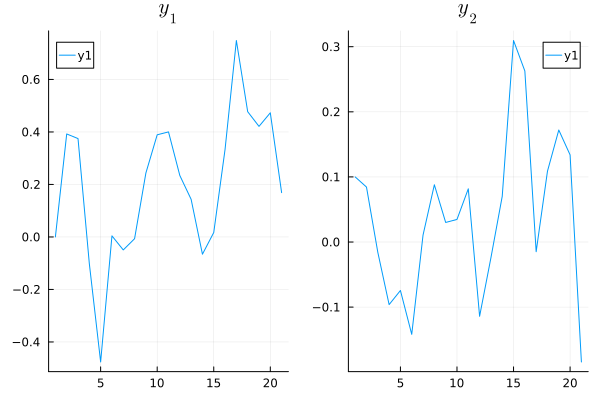

In [126]:
plot(
    plot(sim[1,:], title="\$y_1\$" ),
    plot(sim[2,:], title="\$y_2\$" )
)

Much harder to intepret results from a single simulation...

__Perform K=500 stochastic simulations over 20 periods starting with a one standard-deviation in $e_2$. Plot the result.__

In [127]:
K = 500
sims = [simulate(A,B,Σ,e0_2) for n=1:K] 

500-element Vector{Matrix{Float64}}:
 [0.0 0.3519136419682234 … -0.13632256187189307 0.28734699004199543; 0.1 0.03458950910034711 … 0.05590879127288487 0.1821378027563172]
 [0.0 0.18735118271396525 … -0.5792223496408389 -0.12954015040579497; 0.1 -0.017113568280008512 … 0.06610668517404303 0.034768318939232185]
 [0.0 -0.26355803168343 … 0.13331606138155416 0.10605379996605355; 0.1 -0.08203172271058749 … 0.08789623820459265 0.04302552416068846]
 [0.0 0.447924703915066 … -0.6840511756042715 -0.5087494379321347; 0.1 0.13240167512832168 … -0.13923613251848604 -0.30739802372828207]
 [0.0 0.2864585646636234 … -0.8972892768061322 -0.32525236081256703; 0.1 0.052085969055819484 … -0.009248985478192695 0.19809006901765033]
 [0.0 0.3176852256968753 … -0.07299075149807696 -0.1994033938565344; 0.1 0.04893276414828989 … -0.029399256319346128 -0.17523773567963405]
 [0.0 -0.20515053466386868 … 0.11551566975384928 0.24349840611342544; 0.1 0.10551318621350193 … -0.06835216203436546 0.1977318992358082]
 [

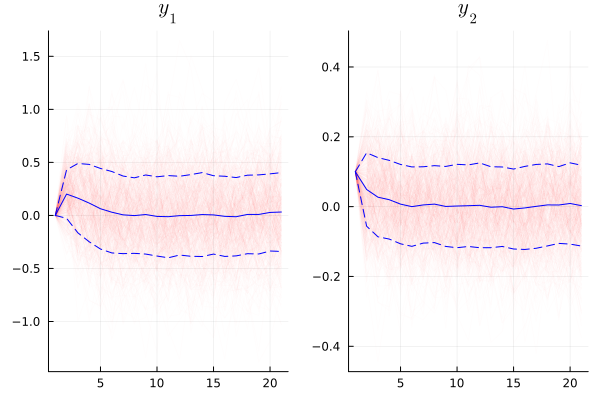

In [128]:
pl1 = plot()
for sim in sims
    plot!(pl1, sim[1,:], title="\$y_1\$", legend=false, color="red", alpha=0.01)
end

# add average
average_1 = [ mean( [sim[1,t] for sim in sims] ) for t=1:size(sims[1],2)]
std_1 = [ std( [sim[1,t] for sim in sims] ) for t=1:size(sims[1],2)]

plot!(pl1, average_1, color="blue")
plot!(pl1, average_1-std_1, color="blue", linestyle=:dash)
plot!(pl1, average_1+std_1, color="blue", linestyle=:dash)

pl2 = plot()
for sim in sims
    plot!(pl2, sim[2,:], title="\$y_2\$", legend=false , color="red", alpha=0.01)
end

# add average
average_2 = [ mean( [sim[2,t] for sim in sims] ) for t=1:size(sims[1],2)]
std_2 = [ std( [sim[2,t] for sim in sims] ) for t=1:size(sims[1],2)]

plot!(pl2, average_2, color="blue")
plot!(pl2, average_2-std_2, color="blue", linestyle=:dash)

plot!(pl2, average_2+std_2, color="blue", linestyle=:dash)

plot(pl1, pl2)


We observe that:

1. the *expected* response is similar to the determinstic irf we computed before
2. volatility makes predictions hard..
3. it looks like the unconditional volatility converges after a few periods

__Ergodic Distribution.__

It can be shown that the ergodic distribution of a VAR1 is a multivariate normal law, with covariance matrix $\Omega$.

This matrix is a solution to the equation $\Omega = A \Omega A' + B \Sigma B'$.

A simple algorithm to find it consist in applying the recurrence $\Omega_n = A \Omega_{n-1} A' + B \Sigma B'$ until convergence, starting with $\Omega_0 =0$.

Implement this algorithm.

In [129]:
function ergodic_steady_state(A,B,Σ; N=1000, tol_η=1e-8)
    Ω0 = Σ*0
    for n = 1:N
        Ω = A*Ω0*A'+B*Σ*B'
        η = maximum( abs.( Ω - Ω0) )
        if η<tol_η
            return Ω
        end
        Ω0 = Ω
    end
    error("No convergence")
end


ergodic_steady_state (generic function with 1 method)

__Compare the result with the empirical ergodic distribution obtained from the simulations__

In [130]:
random_final_points = [sim[:,end] for sim in sims]

500-element Vector{Vector{Float64}}:
 [0.28734699004199543, 0.1821378027563172]
 [-0.12954015040579497, 0.034768318939232185]
 [0.10605379996605355, 0.04302552416068846]
 [-0.5087494379321347, -0.30739802372828207]
 [-0.32525236081256703, 0.19809006901765033]
 [-0.1994033938565344, -0.17523773567963405]
 [0.24349840611342544, 0.1977318992358082]
 [-0.5004115801583995, -0.20431976135074786]
 [-0.09365511537178871, -0.02405222464014385]
 [0.22238420401920062, 0.15540654408684915]
 ⋮
 [0.35324198956855907, -0.052414251103087166]
 [-0.3980090459422957, -0.02266753697793905]
 [-0.07992915762258111, 0.16166607816954648]
 [-0.0019249994388082642, 0.10462559642266155]
 [-0.21584697092718536, -0.19127247705898093]
 [1.072163516270816, 0.24147810520943158]
 [0.2834922315575247, 0.2046794210651945]
 [-0.2854383438166833, -0.061626044462775316]
 [-0.3585049280601489, -0.02995515122129525]

In [131]:
Ω = ergodic_steady_state(A,B,Σ)

2×2 Matrix{Float64}:
 0.141995   0.0215686
 0.0215686  0.0133333

In [132]:
# empirical covariance
cov( random_final_points)
# very close to theoretical one

2×2 Matrix{Float64}:
 0.138121   0.0217592
 0.0217592  0.0133982

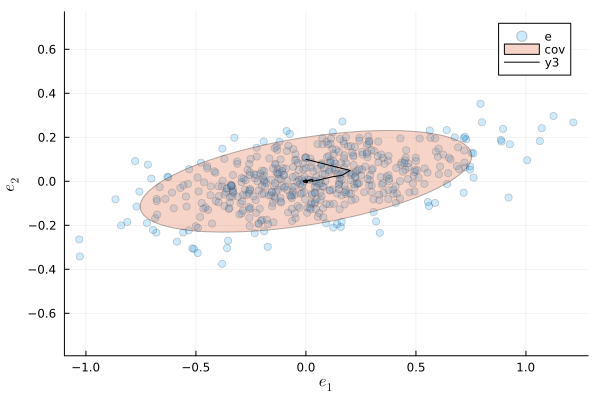

In [133]:

# graphical representation
using StatsPlots

pl = scatter([e[1] for e in random_final_points], [e[2] for e in random_final_points], label="e", xlabel="\$e_1\$", ylabel="\$e_2\$", alpha=0.2)
covellipse!([0,0], Ω, n_std=2, aspect_ratio=1, label="cov")
# let's add the expected path
plot!(pl, average_1, average_2, color="black")